### Embeddings

### Recurrent Neural Networks

### Stacked and bidirectional RNNs

In [22]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
print(tf.__version__)
from tensorflow.keras.layers import Embedding

2.5.0
GPU name: 


In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
type(x_train)

numpy.ndarray

In [9]:
x_train.shape

(25000,)

* Loading the imdb word index using get_word_index()

* Viewing the word index as a dictionary, accounting for index_from

* Retrieving a specific words index

* Viewing an input sentence

* Getting sentiment value

In [10]:
imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [12]:
imdb_word_index['simpsonian']

52256

In [13]:
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [14]:
y_train[0]

1

In [15]:
# Inspecting the input data shape

x_train.shape

(25000,)

In [16]:
# Padding the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [17]:
# Inspecting the output data shape

padded_x_train.shape

(25000, 300)

**Create a Masking Layer**

In [19]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)

In [20]:
# Creating a masking layer

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [21]:
masked_x_train = masking_layer(tf_x_train)

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

In [23]:
# Create an embedding layer using layers.Embedding # Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [24]:
# Inspect an Embedding layer output for a fixed input # Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.03452982, -0.00102832,  0.02659326,  0.01689205,
          -0.02366014,  0.01033969,  0.03643544, -0.03430951,
           0.01934261, -0.0498821 , -0.00216136,  0.01871479,
          -0.02082175, -0.02215269, -0.0185014 ,  0.03000117]],

        [[-0.03892381, -0.02837642, -0.0330525 ,  0.01949174,
           0.03003663,  0.02199595, -0.03145579,  0.01321018,
           0.01266953, -0.00058248,  0.02151668, -0.03385024,
           0.0178118 , -0.02600408, -0.00725995,  0.00017058]],

        [[-0.00708847, -0.01686962,  0.02233994,  0.04120946,
          -0.03889617, -0.00255214,  0.04161963, -0.03607365,
           0.03542921, -0.03536584, -0.04157572,  0.00199971,
          -0.04854944, -0.01169645,  0.00185614, -0.0224409 ]],

        [[-0.01715313,  0.00495061, -0.02405528,  0.04241183,
           0.04893905,  0.04417555,  0.00590109, -0.00960749,
          -0.00908769,  0.01160403,  0.00683711,  0.01218039,
      

In [25]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-3.4529816e-02, -1.0283217e-03,  2.6593257e-02, ...,
        -2.2152686e-02, -1.8501401e-02,  3.0001167e-02],
       [-3.8923811e-02, -2.8376425e-02, -3.3052504e-02, ...,
        -2.6004076e-02, -7.2599538e-03,  1.7057732e-04],
       [-2.6532579e-02, -5.1294640e-04,  8.3403103e-03, ...,
         3.8900066e-02,  3.9577484e-05,  3.5246495e-02],
       ...,
       [ 4.3492507e-02,  1.8635582e-02, -2.5125612e-02, ...,
        -8.9491829e-03, -4.3154716e-02, -4.9183480e-03],
       [-4.7064520e-02, -4.7283880e-03, -2.0872248e-02, ...,
         3.8352836e-02, -1.8717073e-02, -1.5494227e-03],
       [-1.7153133e-02,  4.9506053e-03, -2.4055278e-02, ...,
         6.2366128e-03, -2.4310851e-02,  1.7086152e-02]], dtype=float32)

In [26]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([-0.03693575, -0.02506992, -0.00220019, -0.0053842 , -0.03044928,
        0.03921303,  0.02432308, -0.03921413,  0.00796797,  0.01478443,
       -0.03642455, -0.03281995, -0.00509394,  0.04504016, -0.03056682,
       -0.02608272], dtype=float32)

In [27]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [28]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [30]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):                      
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [31]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [32]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [33]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [34]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [35]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [36]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())

In [37]:
# Specify an embedding dimension

embedding_dim = 16

In [ ]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense



In [38]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None, ))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [40]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 0.6902 - accuracy: 0.5661 - val_loss: 0.6847 - val_accuracy: 0.6391
Epoch 2/5
782/782 [==============================] - 8s 10ms/step - loss: 0.6714 - accuracy: 0.6625 - val_loss: 0.6529 - val_accuracy: 0.7406
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.6303 - accuracy: 0.7504 - val_loss: 0.6024 - val_accuracy: 0.7594
Epoch 4/5
782/782 [==============================] - 8s 10ms/step - loss: 0.5788 - accuracy: 0.7933 - val_loss: 0.5553 - val_accuracy: 0.7812
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.5298 - accuracy: 0.8161 - val_loss: 0.5110 - val_accuracy: 0.7937


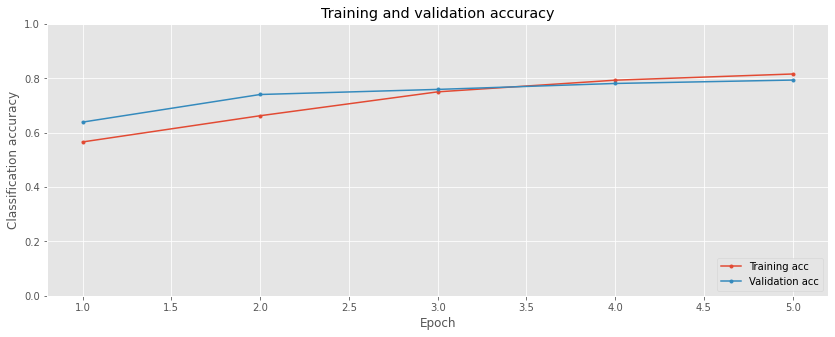

In [42]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [ ]:
# Retrieve the embedding layer's weights from the trained model



In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

In [43]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [44]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1., 1.], [2., 2.], [56., -100]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-0.9932178,  1.       ,  1.       ,  1.       ,  1.       ,
         1.       , -1.       , -1.       , -1.       ,  1.       ,
         1.       , -0.9999971, -1.       ,  0.9727474, -0.9998611,
        -1.       ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [45]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [46]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [47]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [48]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [49]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
                     tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                     tf.keras.layers.LSTM(units=16),
                     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [50]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [51]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
782/782 [==============================] - 1306s 2s/step - loss: 0.3982 - accuracy: 0.8170
Epoch 2/3
782/782 [==============================] - 1299s 2s/step - loss: 0.2345 - accuracy: 0.9119
Epoch 3/3
782/782 [==============================] - 1296s 2s/step - loss: 0.1869 - accuracy: 0.9325


In [52]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [53]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.05338958]], dtype=float32)

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [55]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [56]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [57]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [58]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [59]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [61]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.LSTM(units=32, return_sequences=True),
                             tf.keras.layers.LSTM(units=32, return_sequences=False),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [62]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8), merge_mode='sum'),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [63]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim),
                             tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
                             tf.keras.layers.GRU(units=8, return_sequences=False),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [64]:
# Compile the model

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [65]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 117s 209ms/step - loss: 0.4443 - accuracy: 0.7840
Epoch 2/3
536/536 [==============================] - 111s 207ms/step - loss: 0.2580 - accuracy: 0.8997
Epoch 3/3
536/536 [==============================] - 112s 208ms/step - loss: 0.1962 - accuracy: 0.9269
